# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
#from api_keys import weather_api_key
weather_api_key = "52321c68947fe578903797018a45ced6"
#092ec9f84af7f5af1c9e763bf103a029
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 534


In [3]:
                    # test url  api key and sample data
#url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "Paris"
#city_url =  f'{url}appid={weather_api_key}&q={city}&units=metric'
#city_weather = requests.get(city_url).json()
#print(city_weather)

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f'{url}appid={weather_api_key}&q={city}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kerikeri
Processing Record 2 of Set 1 | labytnangi
Processing Record 3 of Set 1 | bandarbeyla
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | mckenzie
Processing Record 6 of Set 1 | sinabang
Processing Record 7 of Set 1 | casa santa
City not found. Skipping...
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | acarau
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | vila velha
Processing Record 14 of Set 1 | sirte
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | ar ruseris
Processing Record 18 of Set 1 | dunedin
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | uray
Processing Record 21 of Set 1 | wailua homesteads
Processing Record 22 o

Processing Record 41 of Set 4 | santa cruz
Processing Record 42 of Set 4 | salinopolis
Processing Record 43 of Set 4 | guozhen
Processing Record 44 of Set 4 | constantia
Processing Record 45 of Set 4 | tarko-sale
Processing Record 46 of Set 4 | huarmey
Processing Record 47 of Set 4 | malango
Processing Record 48 of Set 4 | at taj
Processing Record 49 of Set 4 | cumaribo
City not found. Skipping...
Processing Record 0 of Set 5 | bel ombre
Processing Record 1 of Set 5 | sechura
Processing Record 2 of Set 5 | lihue
Processing Record 3 of Set 5 | kirensk
Processing Record 4 of Set 5 | mendi
Processing Record 5 of Set 5 | koulikoro
Processing Record 6 of Set 5 | chokwe
Processing Record 7 of Set 5 | bubaque
Processing Record 8 of Set 5 | enewetak
Processing Record 9 of Set 5 | bumba
Processing Record 10 of Set 5 | madalena
Processing Record 11 of Set 5 | vyksa
Processing Record 12 of Set 5 | port alfred
Processing Record 13 of Set 5 | tabou
Processing Record 14 of Set 5 | bratsk
Processing 

City not found. Skipping...
Processing Record 33 of Set 8 | phan rang-thap cham
Processing Record 34 of Set 8 | humaita
Processing Record 35 of Set 8 | williams lake
Processing Record 36 of Set 8 | camabatela
Processing Record 37 of Set 8 | taulaga
Processing Record 38 of Set 8 | itupiranga
Processing Record 39 of Set 8 | haiku-pauwela
Processing Record 40 of Set 8 | novo aripuana
Processing Record 41 of Set 8 | alaghsas
Processing Record 42 of Set 8 | colares
Processing Record 43 of Set 8 | fuglafjordur
Processing Record 44 of Set 8 | rumoi
Processing Record 45 of Set 8 | omarska
Processing Record 46 of Set 8 | nieuw amsterdam
Processing Record 47 of Set 8 | ierapetra
Processing Record 48 of Set 8 | margate
Processing Record 49 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 0 of Set 9 | champerico
Processing Record 1 of Set 9 | usinsk
Processing Record 2 of Set 9 | bhamo
Processing Record 3 of Set 9 | tabuk
Processing Record 4 of Set 9 | progreso
Processing Record

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          509
Lat           509
Lng           509
Max Temp      509
Humidity      509
Cloudiness    509
Wind Speed    509
Country       509
Date          509
dtype: int64


In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kerikeri,-35.2268,173.9474,9.62,80,51,2.84,NZ,1690389105
1,labytnangi,66.6572,66.4183,16.88,95,100,3.97,RU,1690388769
2,bandarbeyla,9.4942,50.8122,24.11,82,9,14.73,SO,1690388739
3,qaqortoq,60.7167,-46.0333,6.82,84,100,2.75,GL,1690388593
4,mckenzie,47.7084,-103.4477,27.79,30,0,0.00,US,1690388910


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,9.62,80,51,2.84,NZ,1690389105
1,labytnangi,66.6572,66.4183,16.88,95,100,3.97,RU,1690388769
2,bandarbeyla,9.4942,50.8122,24.11,82,9,14.73,SO,1690388739
3,qaqortoq,60.7167,-46.0333,6.82,84,100,2.75,GL,1690388593
4,mckenzie,47.7084,-103.4477,27.79,30,0,0.00,US,1690388910


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

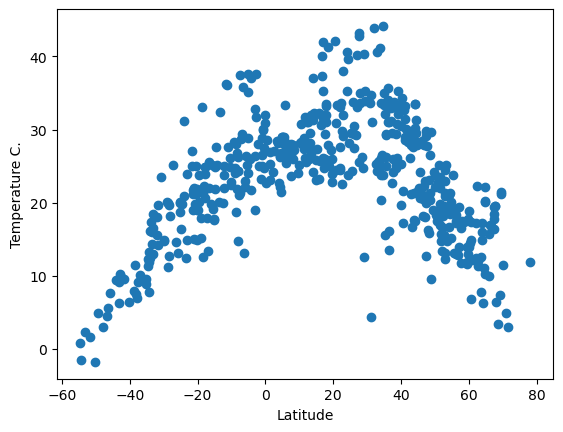

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
# Incorporate the other graph properties
title = "latitude vs. temperature"
plt.xlabel("Latitude")
plt.ylabel("Temperature C.")
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

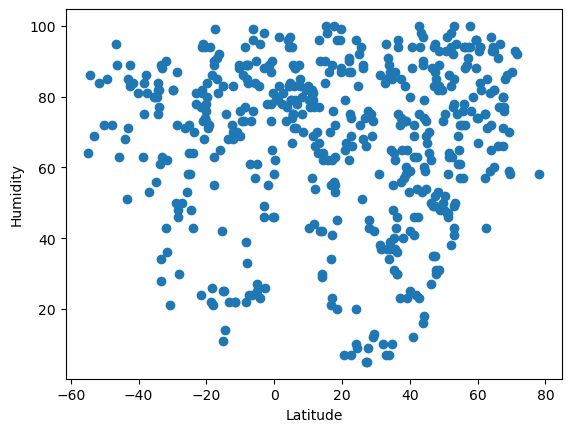

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
title = "latitude vs. Humidity"
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

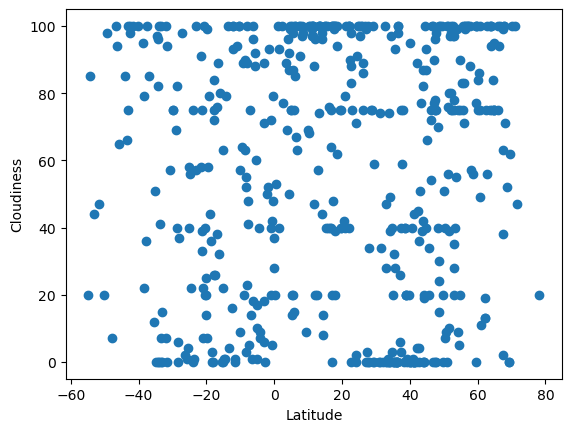

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
title = "latitude vs. Cloudiness"
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

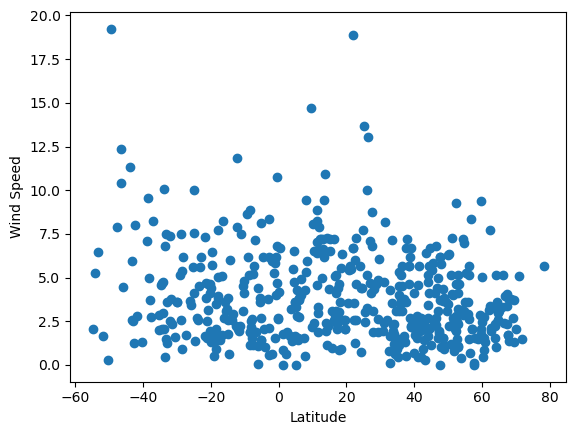

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
title = "latitude vs. Wind Speed"
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def regress(x,y):
    (slope, intercept, r_value, p_value, std_err) = linregress(x,y)
    regress_values = x * slope + intercept
    plt.scatter(x,y)
    plt.plot(x,regress_values)
    print(f"the r value is {r_value}")
    plt.show()
    
    
    

In [14]:
        # test regress function
#x =city_data_df['Lat']
#y= city_data_df['Wind Speed']
#regress(x,y)

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =city_data_df.loc[city_data_df ['Lat'] >= 0] 

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,labytnangi,66.6572,66.4183,16.88,95,100,3.97,RU,1690388769
2,bandarbeyla,9.4942,50.8122,24.11,82,9,14.73,SO,1690388739
3,qaqortoq,60.7167,-46.0333,6.82,84,100,2.75,GL,1690388593
4,mckenzie,47.7084,-103.4477,27.79,30,0,0.00,US,1690388910
5,sinabang,2.4803,96.3801,27.00,81,77,1.91,ID,1690388565


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =city_data_df.loc[city_data_df ['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,9.62,80,51,2.84,NZ,1690389105
6,blackmans bay,-43.0167,147.3167,10.29,85,100,2.50,AU,1690388320
7,acarau,-2.8856,-40.1200,31.65,49,6,8.35,BR,1690388466
10,port-aux-francais,-49.3500,70.2167,4.98,85,98,19.23,TF,1690388520
11,vila velha,-20.3297,-40.2925,24.97,74,20,4.63,BR,1690389107


###  Temperature vs. Latitude Linear Regression Plot

the r value is -0.6068716797206194


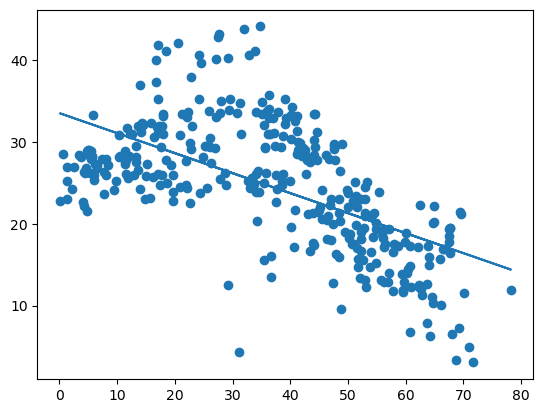

the r value is -0.6068716797206194


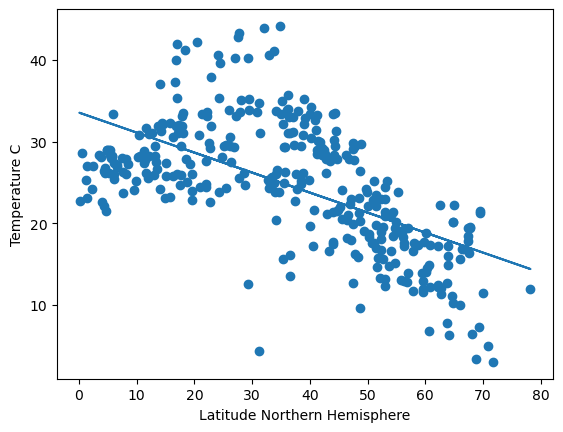

In [17]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
regress(x,y)

title = "Temperature vs. Latitude Linear Regression Plot"
plt.xlabel("Latitude Northern Hemisphere")
plt.ylabel("Temperature C")

regress(x,y)

the r value is 0.8420024472937215


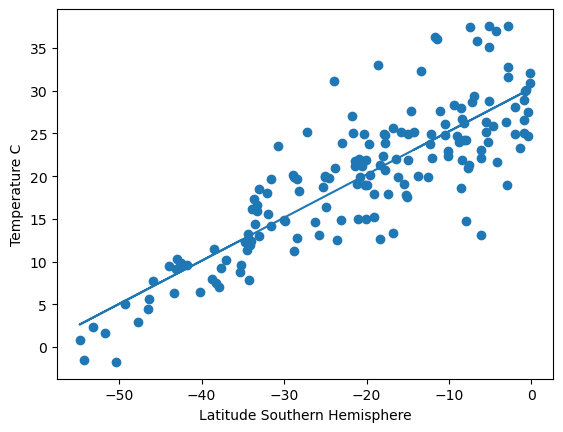

In [18]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
title = "Temperature vs. Latitude Linear Regression Plot"
plt.xlabel("Latitude Southern Hemisphere")
plt.ylabel("Temperature C")
regress(x,y)

**Discussion about the linear relationship:** YOUR RESPONSE HERE: These two graphs show tha temperrature and llititude are very related. The temperature increases as the latitiude moves towards zero.

### Humidity vs. Latitude Linear Regression Plot

the r value is 0.04897070435143646


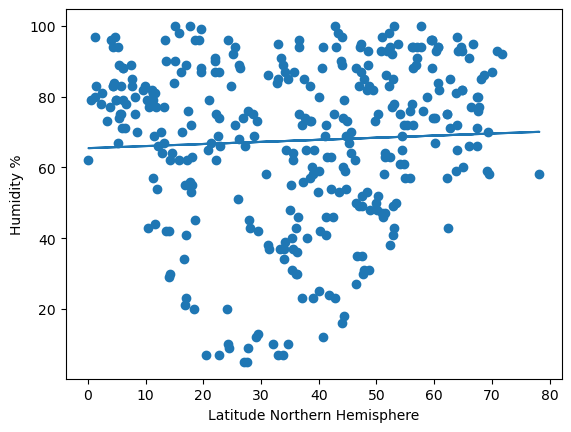

In [19]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
title = "Humidity vs. Latitude Linear Regression Plot"
plt.xlabel("Latitude Northern Hemisphere")
plt.ylabel("Humidity %")
regress(x,y)

the r value is -0.1164681416836843


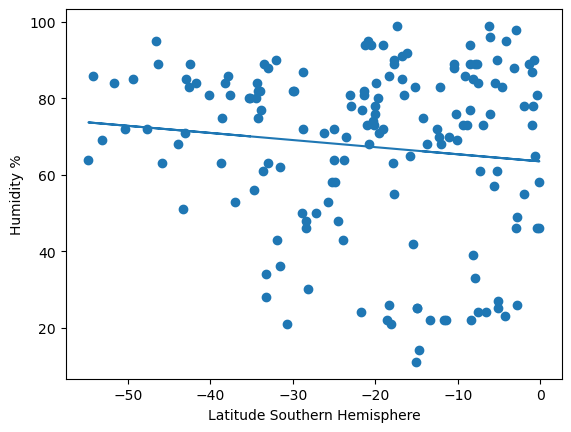

In [20]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
title = "Humidity vs. Latitude Linear Regression Plot"
plt.xlabel("Latitude Southern Hemisphere")
plt.ylabel("Humidity %")
regress(x,y)

**Discussion about the linear relationship:** YOUR RESPONSE HERE:  The close to zero r value shows that humidity and latitude do not have a close relationship.

### Cloudiness vs. Latitude Linear Regression Plot

the r value is -0.0849701778947429


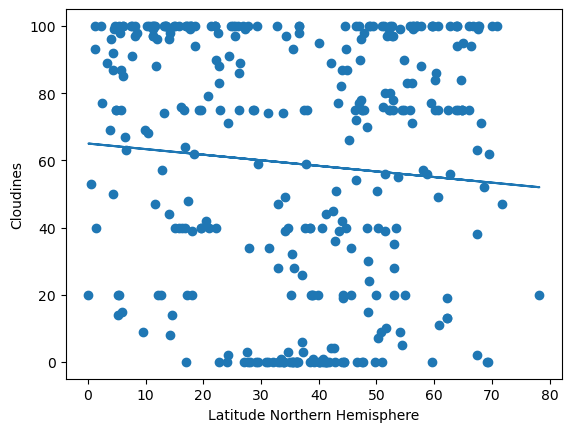

In [21]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
title = "Cloudiness vs. Latitude Linear Regression Plot"
plt.xlabel("Latitude Northern Hemisphere")
plt.ylabel("Cloudines")
regress(x,y)

the r value is -0.14507254257186375


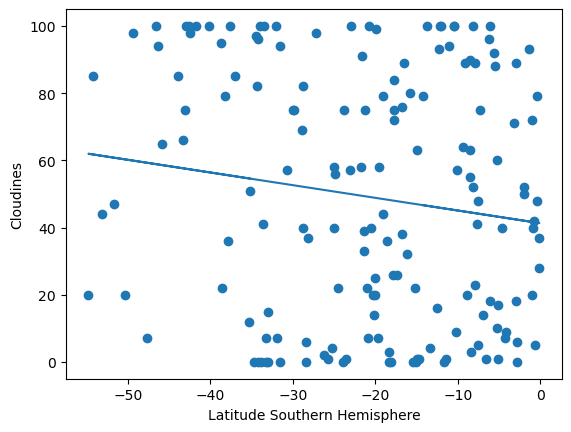

In [22]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
title = "Cloudiness vs. Latitude Linear Regression Plot"
plt.xlabel("Latitude Southern Hemisphere")
plt.ylabel("Cloudines")
regress(x,y)

**Discussion about the linear relationship:** YOUR RESPONSE HERE: These graphs show that it tends to be slightly more cloudy in the southern hemishpere as you aproach the south pole. The opposite is tru of the northern hemisphere, it tends to be slightly less cloudy approaching the north pole

### Wind Speed vs. Latitude Linear Regression Plot

the r value is -0.1964458115412096


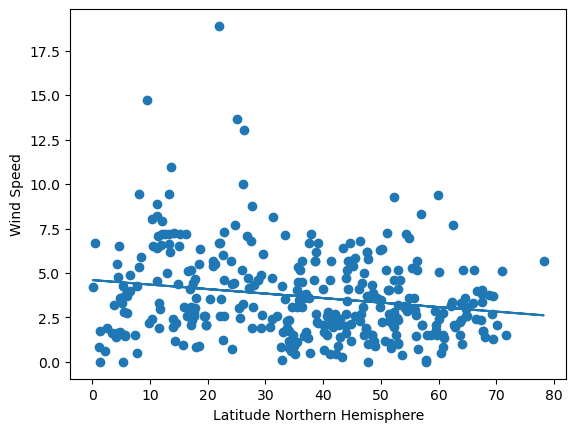

In [23]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
title = "Wind Speed vs. Latitude Linear Regression Plot"
plt.xlabel("Latitude Northern Hemisphere")
plt.ylabel("Wind Speed")
regress(x,y)

the r value is -0.1718263940112628


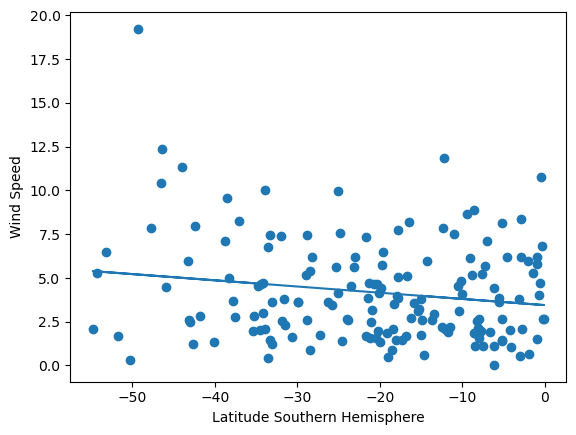

In [24]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
title = "Wind Speed vs. Latitude Linear Regression Plot"
plt.xlabel("Latitude Southern Hemisphere")
plt.ylabel("Wind Speed")
regress(x,y)

**Discussion about the linear relationship:** YOUR RESPONSE HERE: The wind speed behaves similar to the cloudiness. For the southern hemisphere it tends to get slighly windier aproaching the  south pole, for the nothern hemisphere it tends to get slighly less windy aproaching the north pole.